### Sweeps to analyze how budget constraints affect miss rate

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from tqdm import tqdm
sns.set(style='white', font_scale=1.5)
import numpy as np
from pulp import *
import os, glob
import pdb
from tqdm import tqdm
import sys
sys.path.insert(0, "../decision_alg")
from DecisionAnalysis import AbxDecisionMaker, load_predictions, perform_sweep, plot_histogram
from integer_programming import get_clinician_prescribing_patterns


In [16]:
abx_settings = {"Ceftriaxone" : 404,
    "Vancomycin_Zosyn" :  149,
    "Zosyn" : 102,
    "Vancomycin_Ceftriaxone" : 31,
    "Vancomycin_Cefepime" : 23,
    "Cefepime" : 14,
    "Vancomycin" : 13,
    "Vancomycin_Meropenem" : 9,
    "Meropenem" : 9,
    "Cefazolin" : 8,
    "Ciprofloxacin" : 8,
    "Ampicillin" : 0,
    }

df_predictions = load_predictions()
df_drugs = get_clinician_prescribing_patterns()
opt = AbxDecisionMaker(df_predictions, df_drugs, abx_settings)

Performing Vancomycin_Zosyn to Ampicillin sweep


100%|██████████| 149/149 [02:13<00:00,  1.12it/s]


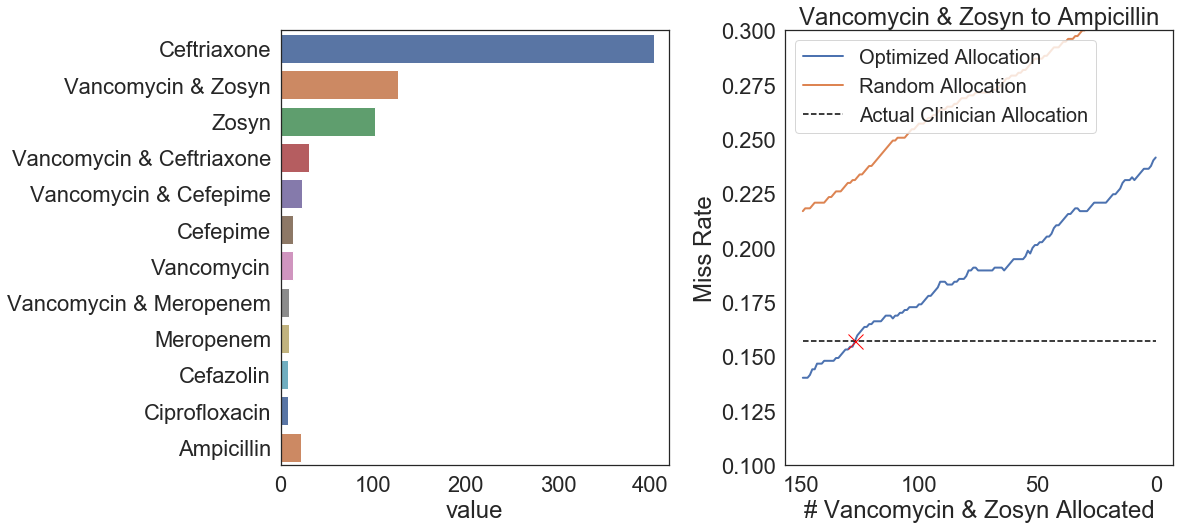

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
os.makedirs('./sweep_results', exist_ok=True)
fname='./sweep_results/test.txt'
settings = perform_sweep(opt, abx_1='Vancomycin_Zosyn', abx_2='Ampicillin', ax=ax[1], fname=fname, legend=True, append=False)
plot_histogram(settings, ax[0])
plt.subplots_adjust(wspace=0.3)
plt.show()

### Select Sweeps for main body of text
* Vancomycin & Zosyn to Zosyn
* Zosyn to Cefazolin
* Ceftriaxone to Cefazolin
* Ceftriaxone to Ampicillin

Performing Vancomycin_Zosyn to Zosyn sweep


100%|██████████| 149/149 [02:23<00:00,  1.04it/s]


Performing Zosyn to Cefazolin sweep


100%|██████████| 102/102 [01:24<00:00,  1.21it/s]


Performing Ceftriaxone to Cefazolin sweep


100%|██████████| 404/404 [06:13<00:00,  1.08it/s]


Performing Ceftriaxone to Ampicillin sweep


100%|██████████| 404/404 [05:08<00:00,  1.31it/s]


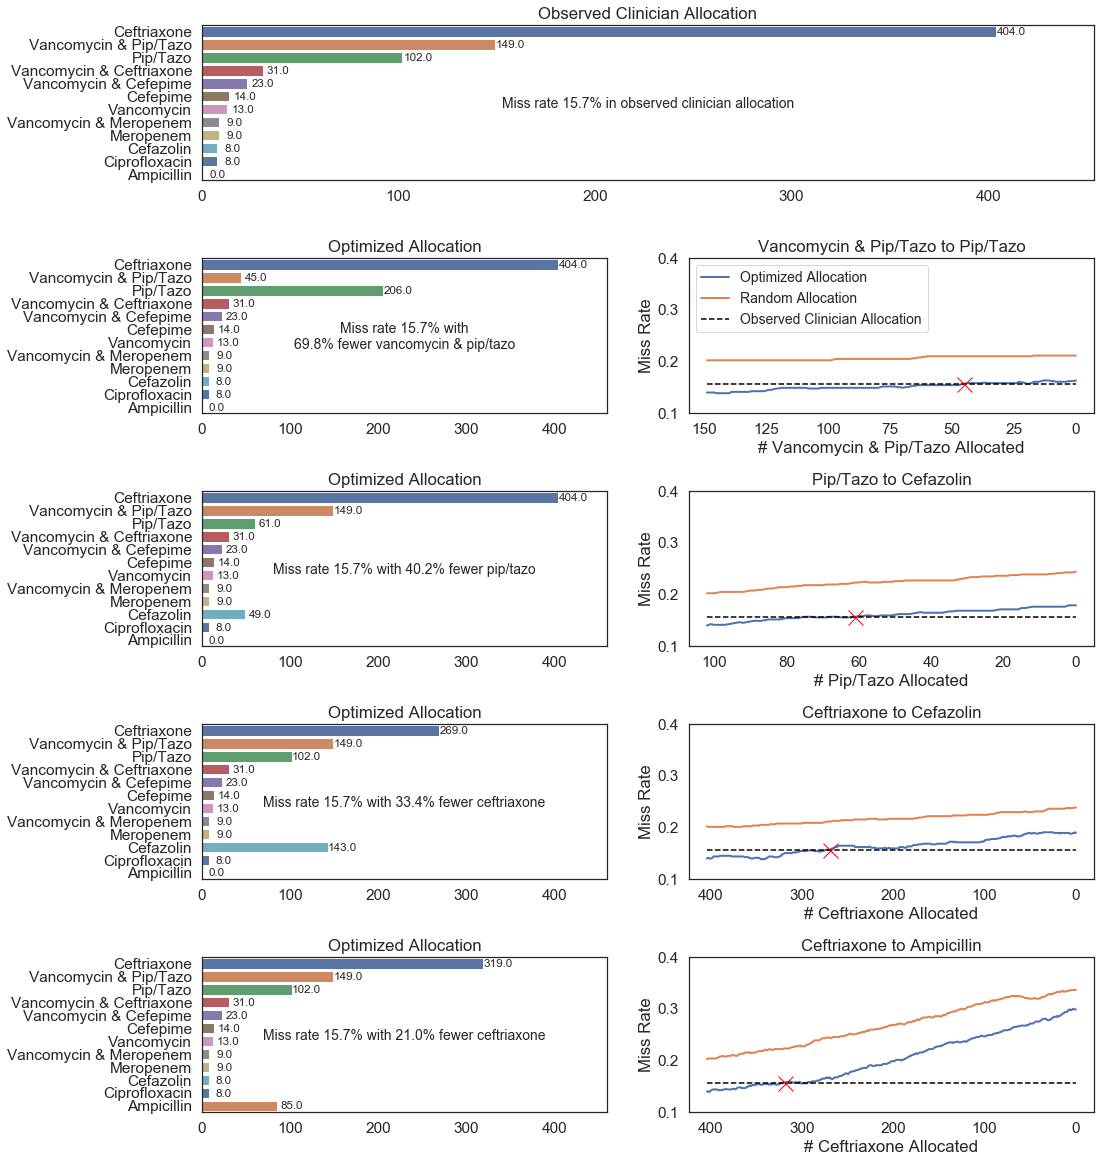

In [14]:
# fig, ax = plt.subplots(5, 2, figsize=(16, 50))
sns.set(style='white', font_scale=1.4)
os.makedirs('./sweep_results', exist_ok=True)
fname='./sweep_results/test.txt'

# Plot original settings
abx_settings = {"Ceftriaxone" : 404,
    "Vancomycin_Zosyn" :  149,
    "Zosyn" : 102,
    "Vancomycin_Ceftriaxone" : 31,
    "Vancomycin_Cefepime" : 23,
    "Cefepime" : 14,
    "Vancomycin" : 13,
    "Vancomycin_Meropenem" : 9,
    "Meropenem" : 9,
    "Cefazolin" : 8,
    "Ciprofloxacin" : 8,
    "Ampicillin" : 0,
    }

plt.figure(figsize=(16,20))
gs = gridspec.GridSpec(5, 2, hspace=0.5)
ax1a = plt.subplot(gs[0, :])

ax2a = plt.subplot(gs[1, 0])
ax2b = plt.subplot(gs[1, 1])

ax3a = plt.subplot(gs[2, 0])
ax3b = plt.subplot(gs[2, 1])

ax4a = plt.subplot(gs[3, 0])
ax4b = plt.subplot(gs[3, 1])

ax5a = plt.subplot(gs[4, 0])
ax5b = plt.subplot(gs[4, 1])

axes = [[ax1a], [ax2a, ax2b], [ax3a, ax3b], [ax4a, ax4b], [ax5a, ax5b]]

plot_histogram(abx_settings, axes[0][0])
axes[0][0].set_title("Observed Clinician Allocation")
axes[0][0].set_xlabel('')

# Vanc zosyn to zosyn
settings, miss_rate, reduction_rate = perform_sweep(opt,
                                      abx_1='Vancomycin_Zosyn',
                                      abx_2='Zosyn',
                                      ax=axes[1][1],
                                      fname='./sweep_results/Vancomycin_Zosyn_to_Zosyn.txt',
                                      legend=True,
                                      append=False)
plot_histogram(settings, axes[1][0], miss_rate, reduction_rate, 'vancomycin & pip/tazo')
axes[1][0].set_title("Optimized Allocation")


# Zosyn to Cefazolin
settings, miss_rate, reduction_rate = perform_sweep(opt,
                                    abx_1='Zosyn',
                                    abx_2='Cefazolin',
                                    ax=axes[2][1],
                                    fname='./sweep_results/Zosyn_to_Cefazolin.txt',
                                    legend=False,
                                    append=False)
plot_histogram(settings, axes[2][0], miss_rate, reduction_rate, 'pip/tazo')
axes[2][0].set_title("Optimized Allocation")


# Ceftriaxone to Cefazolin
settings, miss_rate, reduction_rate = perform_sweep(opt,
                                    abx_1='Ceftriaxone',
                                    abx_2='Cefazolin',
                                    ax=axes[3][1],
                                    fname='./sweep_results/Ceftriaxone_to_Cefazolin.txt',
                                    legend=False,
                                    append=False)
plot_histogram(settings, axes[3][0], miss_rate, reduction_rate, 'ceftriaxone')
axes[3][0].set_title("Optimized Allocation")


settings, miss_rate, reduction_rate = perform_sweep(opt,
                                    abx_1='Ceftriaxone',
                                    abx_2='Ampicillin',
                                    ax=axes[4][1],
                                    fname='./sweep_results/Ceftriaxone_to_Ampicillin.txt',
                                    legend=False,
                                    append=False)
plot_histogram(settings, axes[4][0], miss_rate, reduction_rate, 'ceftriaxone')
axes[4][0].set_title("Optimized Allocation")
plt.savefig('sweeps_for_main_text.png', bbox_inches='tight')
plt.show()

## Perform de-escalation sweeps

Here we take every combo of broader to narrower spectrum antibiotic and perform a sweep where the allocation constraint for the broader drug is reduced in favor of the narrower drug.  Save all to a pdf. 

In [17]:
abx_rankings = ['Vancomycin_Meropenem',
                'Vancomycin_Cefepime',
                'Vancomycin_Zosyn',
                'Zosyn',
                'Vancomycin_Ceftriaxone',
                'Meropenem',
                'Cefepime',
                'Ceftriaxone',
                'Ciprofloxacin',
                'Cefazolin',
                'Ampicillin',
                'Vancomycin'
                ]


def get_narrower_sets(abx_rankings):
    """Get a list of tupes for sweeps"""
    combos = []
    for i, abx in enumerate(abx_rankings):
        combos += [(abx, abx_rankings[j]) for j in range(len(abx_rankings)) if j > i
                   and abx != 'Ampicillin']
    
    print("Number of sweep plots %s" % len(combos))
    return combos

def create_axes(num_sweeps, first=False):
    gs = gridspec.GridSpec(num_sweeps, 2, hspace=0.5)
    axes = []
    if first:
        axes.append([plt.subplot(gs[0, :])])
        for i in range(num_sweeps-1):
            axes.append([plt.subplot(gs[i+1, 0]), plt.subplot(gs[i+1, 1])])
    else:
        for i in range(num_sweeps):
            axes.append([plt.subplot(gs[i, 0]), plt.subplot(gs[i, 1])])
    return axes

In [18]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages("Sweep_Plots_Broad_to_Narrow.pdf")
abx_combos = get_narrower_sets(abx_rankings)

Number of sweep plots 65


Performing Vancomycin_Meropenem to Vancomycin_Cefepime sweep


100%|██████████| 9/9 [00:06<00:00,  1.31it/s]


Performing Vancomycin_Meropenem to Vancomycin_Zosyn sweep


100%|██████████| 9/9 [00:06<00:00,  1.30it/s]


Performing Vancomycin_Meropenem to Zosyn sweep


100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


Performing Vancomycin_Meropenem to Vancomycin_Ceftriaxone sweep


100%|██████████| 9/9 [00:06<00:00,  1.30it/s]


Performing Vancomycin_Meropenem to Meropenem sweep


100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


Performing Vancomycin_Meropenem to Cefepime sweep


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


Performing Vancomycin_Meropenem to Ceftriaxone sweep


100%|██████████| 9/9 [00:07<00:00,  1.18it/s]


Performing Vancomycin_Meropenem to Ciprofloxacin sweep


100%|██████████| 9/9 [00:06<00:00,  1.30it/s]


Performing Vancomycin_Meropenem to Cefazolin sweep


100%|██████████| 9/9 [00:07<00:00,  1.21it/s]


Performing Vancomycin_Meropenem to Ampicillin sweep


100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


Performing Vancomycin_Meropenem to Vancomycin sweep


100%|██████████| 9/9 [00:08<00:00,  1.11it/s]


Performing Vancomycin_Cefepime to Vancomycin_Zosyn sweep


100%|██████████| 23/23 [00:29<00:00,  1.29s/it]


Performing Vancomycin_Cefepime to Zosyn sweep


100%|██████████| 23/23 [00:19<00:00,  1.18it/s]


Performing Vancomycin_Cefepime to Vancomycin_Ceftriaxone sweep


100%|██████████| 23/23 [00:26<00:00,  1.13s/it]


Performing Vancomycin_Cefepime to Meropenem sweep


100%|██████████| 23/23 [00:18<00:00,  1.24it/s]


Performing Vancomycin_Cefepime to Cefepime sweep


100%|██████████| 23/23 [00:17<00:00,  1.29it/s]


Performing Vancomycin_Cefepime to Ceftriaxone sweep


100%|██████████| 23/23 [00:19<00:00,  1.20it/s]


Performing Vancomycin_Cefepime to Ciprofloxacin sweep


100%|██████████| 23/23 [00:19<00:00,  1.16it/s]


Performing Vancomycin_Cefepime to Cefazolin sweep


100%|██████████| 23/23 [00:20<00:00,  1.14it/s]


Performing Vancomycin_Cefepime to Ampicillin sweep


100%|██████████| 23/23 [00:17<00:00,  1.29it/s]


Performing Vancomycin_Cefepime to Vancomycin sweep


100%|██████████| 23/23 [00:19<00:00,  1.18it/s]


Performing Vancomycin_Zosyn to Zosyn sweep


100%|██████████| 149/149 [02:06<00:00,  1.17it/s]


Performing Vancomycin_Zosyn to Vancomycin_Ceftriaxone sweep


100%|██████████| 149/149 [02:13<00:00,  1.11it/s]


Performing Vancomycin_Zosyn to Meropenem sweep


100%|██████████| 149/149 [02:30<00:00,  1.01s/it]


Performing Vancomycin_Zosyn to Cefepime sweep


100%|██████████| 149/149 [02:14<00:00,  1.11it/s]


Performing Vancomycin_Zosyn to Ceftriaxone sweep


100%|██████████| 149/149 [02:08<00:00,  1.16it/s]


Performing Vancomycin_Zosyn to Ciprofloxacin sweep


100%|██████████| 149/149 [02:08<00:00,  1.16it/s]


Performing Vancomycin_Zosyn to Cefazolin sweep


100%|██████████| 149/149 [02:02<00:00,  1.22it/s]


Performing Vancomycin_Zosyn to Ampicillin sweep


100%|██████████| 149/149 [02:01<00:00,  1.23it/s]


Performing Vancomycin_Zosyn to Vancomycin sweep


100%|██████████| 149/149 [01:56<00:00,  1.28it/s]


Performing Zosyn to Vancomycin_Ceftriaxone sweep


100%|██████████| 102/102 [01:16<00:00,  1.34it/s]


Performing Zosyn to Meropenem sweep


100%|██████████| 102/102 [01:16<00:00,  1.33it/s]


Performing Zosyn to Cefepime sweep


100%|██████████| 102/102 [01:16<00:00,  1.34it/s]


Performing Zosyn to Ceftriaxone sweep


100%|██████████| 102/102 [01:17<00:00,  1.32it/s]


Performing Zosyn to Ciprofloxacin sweep


100%|██████████| 102/102 [01:16<00:00,  1.34it/s]


Performing Zosyn to Cefazolin sweep


100%|██████████| 102/102 [01:15<00:00,  1.35it/s]


Performing Zosyn to Ampicillin sweep


100%|██████████| 102/102 [01:11<00:00,  1.43it/s]


Performing Zosyn to Vancomycin sweep


100%|██████████| 102/102 [01:15<00:00,  1.34it/s]


Performing Vancomycin_Ceftriaxone to Meropenem sweep


100%|██████████| 31/31 [00:22<00:00,  1.36it/s]


Performing Vancomycin_Ceftriaxone to Cefepime sweep


100%|██████████| 31/31 [00:23<00:00,  1.33it/s]


Performing Vancomycin_Ceftriaxone to Ceftriaxone sweep


100%|██████████| 31/31 [00:23<00:00,  1.33it/s]


Performing Vancomycin_Ceftriaxone to Ciprofloxacin sweep


100%|██████████| 31/31 [00:22<00:00,  1.35it/s]


Performing Vancomycin_Ceftriaxone to Cefazolin sweep


100%|██████████| 31/31 [00:22<00:00,  1.35it/s]


Performing Vancomycin_Ceftriaxone to Ampicillin sweep


100%|██████████| 31/31 [00:21<00:00,  1.44it/s]


Performing Vancomycin_Ceftriaxone to Vancomycin sweep


100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


Performing Meropenem to Cefepime sweep


100%|██████████| 9/9 [00:06<00:00,  1.35it/s]


Performing Meropenem to Ceftriaxone sweep


100%|██████████| 9/9 [00:06<00:00,  1.36it/s]


Performing Meropenem to Ciprofloxacin sweep


100%|██████████| 9/9 [00:06<00:00,  1.33it/s]


Performing Meropenem to Cefazolin sweep


100%|██████████| 9/9 [00:06<00:00,  1.37it/s]
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


Performing Meropenem to Ampicillin sweep


100%|██████████| 9/9 [00:06<00:00,  1.42it/s]


Performing Meropenem to Vancomycin sweep


100%|██████████| 9/9 [00:06<00:00,  1.32it/s]


Performing Cefepime to Ceftriaxone sweep


100%|██████████| 14/14 [00:10<00:00,  1.33it/s]


Performing Cefepime to Ciprofloxacin sweep


100%|██████████| 14/14 [00:10<00:00,  1.36it/s]


Performing Cefepime to Cefazolin sweep


100%|██████████| 14/14 [00:11<00:00,  1.23it/s]
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


Performing Cefepime to Ampicillin sweep


100%|██████████| 14/14 [00:10<00:00,  1.37it/s]


Performing Cefepime to Vancomycin sweep


100%|██████████| 14/14 [00:10<00:00,  1.38it/s]


Performing Ceftriaxone to Ciprofloxacin sweep


100%|██████████| 404/404 [04:56<00:00,  1.36it/s]


Performing Ceftriaxone to Cefazolin sweep


100%|██████████| 404/404 [04:59<00:00,  1.35it/s]


Performing Ceftriaxone to Ampicillin sweep


100%|██████████| 404/404 [04:38<00:00,  1.45it/s]
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


Performing Ceftriaxone to Vancomycin sweep


100%|██████████| 404/404 [04:57<00:00,  1.36it/s]


Performing Ciprofloxacin to Cefazolin sweep


100%|██████████| 8/8 [00:05<00:00,  1.37it/s]


Performing Ciprofloxacin to Ampicillin sweep


100%|██████████| 8/8 [00:05<00:00,  1.40it/s]


Performing Ciprofloxacin to Vancomycin sweep


100%|██████████| 8/8 [00:05<00:00,  1.35it/s]


Performing Cefazolin to Ampicillin sweep


100%|██████████| 8/8 [00:05<00:00,  1.43it/s]


<Figure size 1152x1440 with 0 Axes>

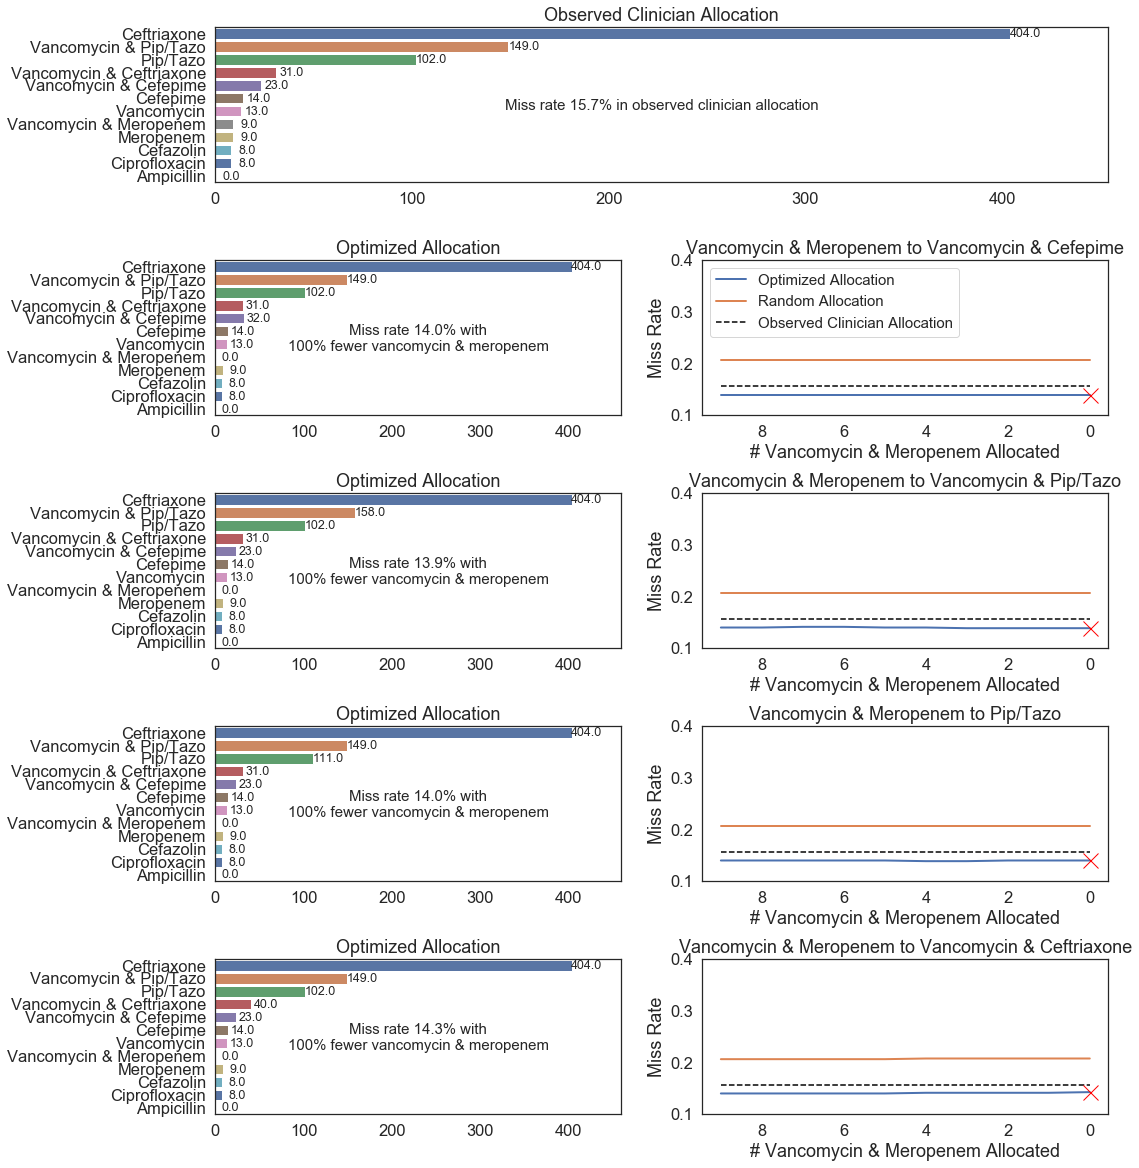

<Figure size 1152x1440 with 0 Axes>

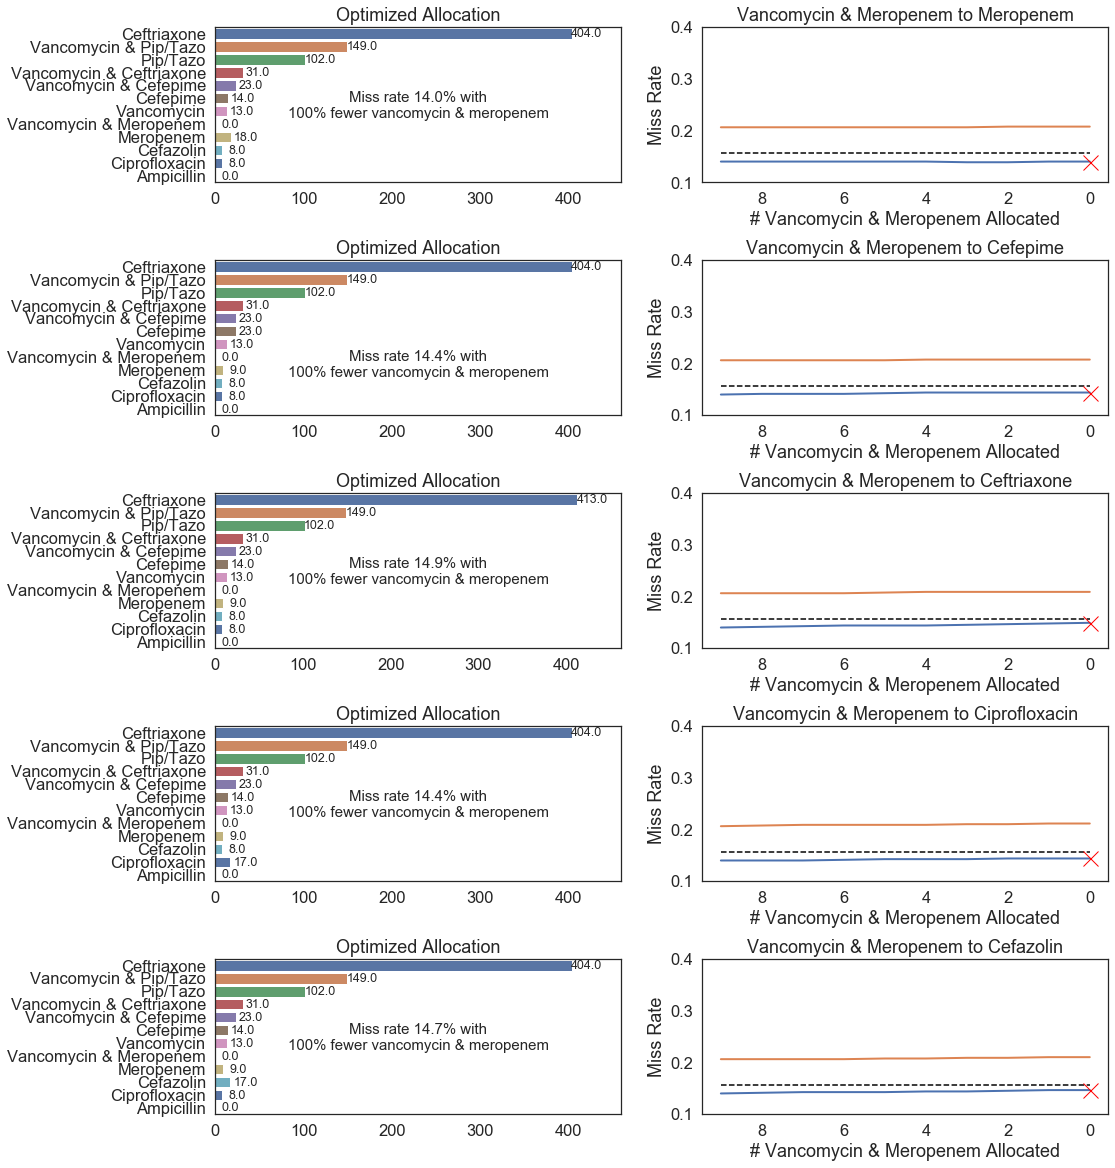

<Figure size 1152x1440 with 0 Axes>

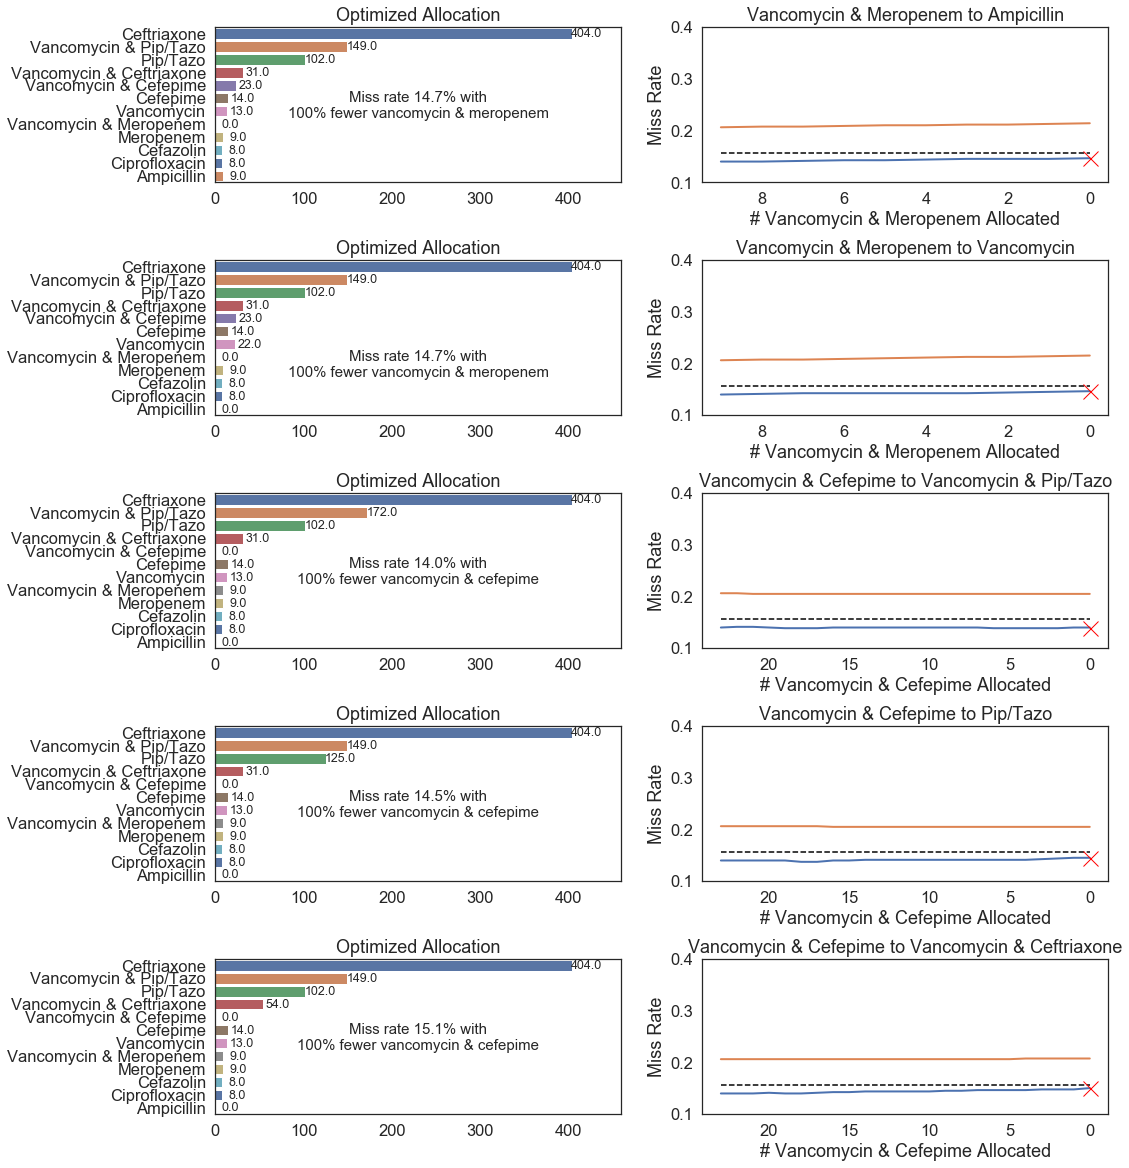

<Figure size 1152x1440 with 0 Axes>

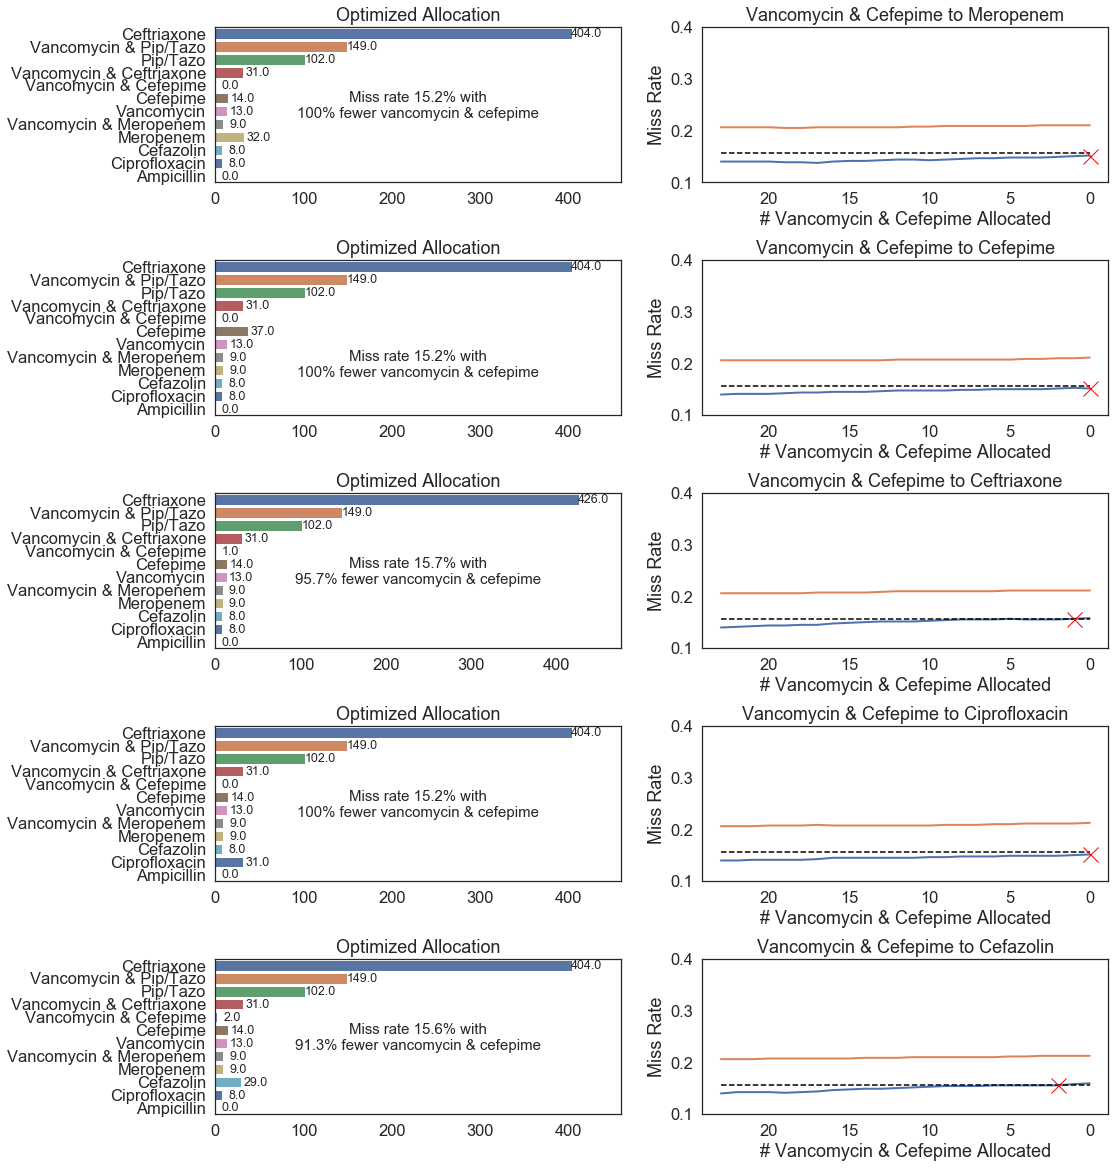

<Figure size 1152x1440 with 0 Axes>

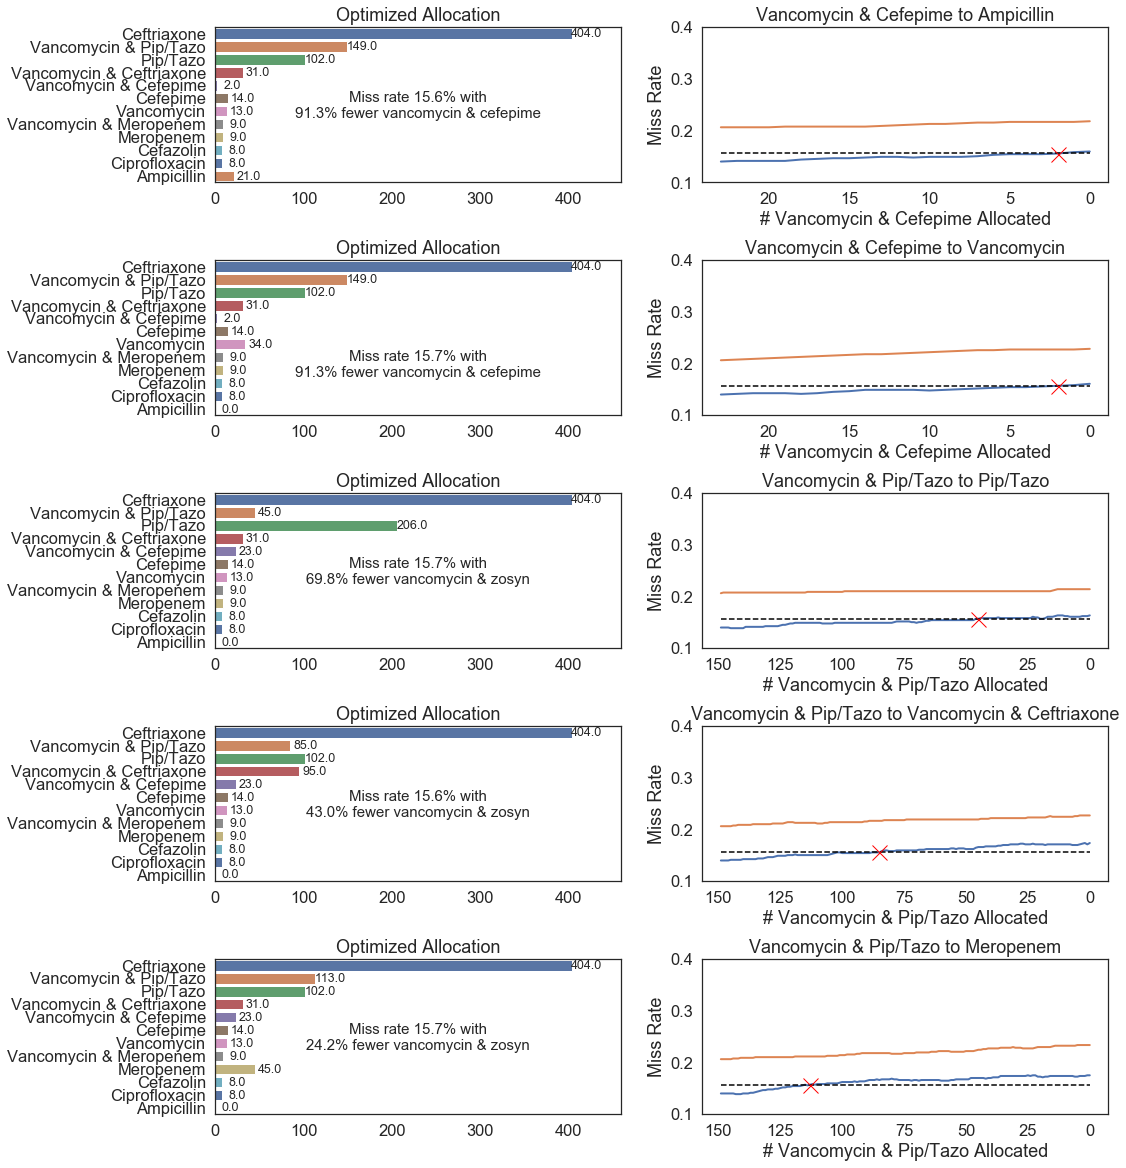

<Figure size 1152x1440 with 0 Axes>

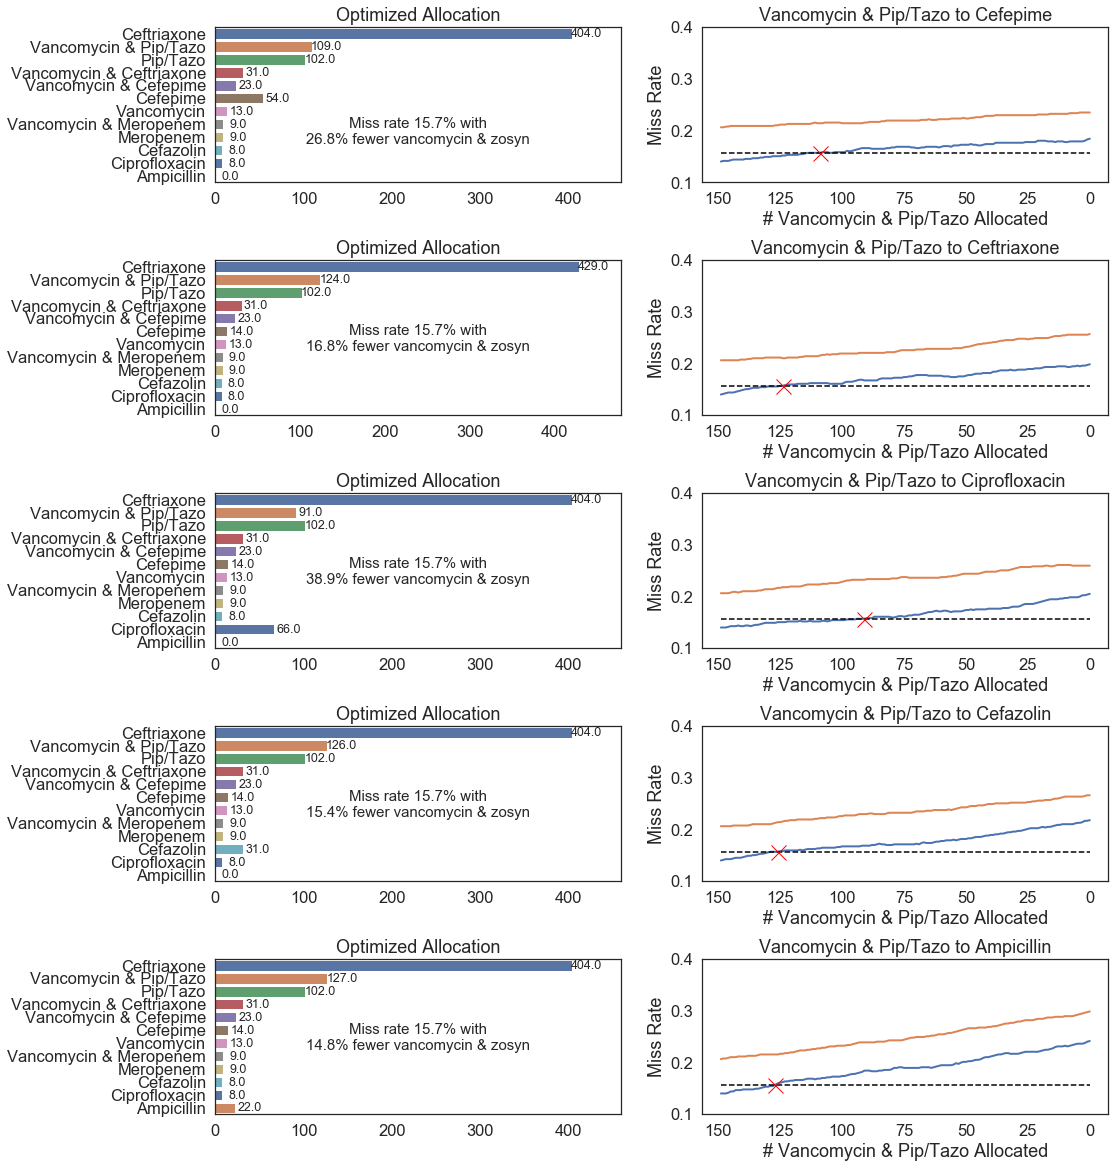

<Figure size 1152x1440 with 0 Axes>

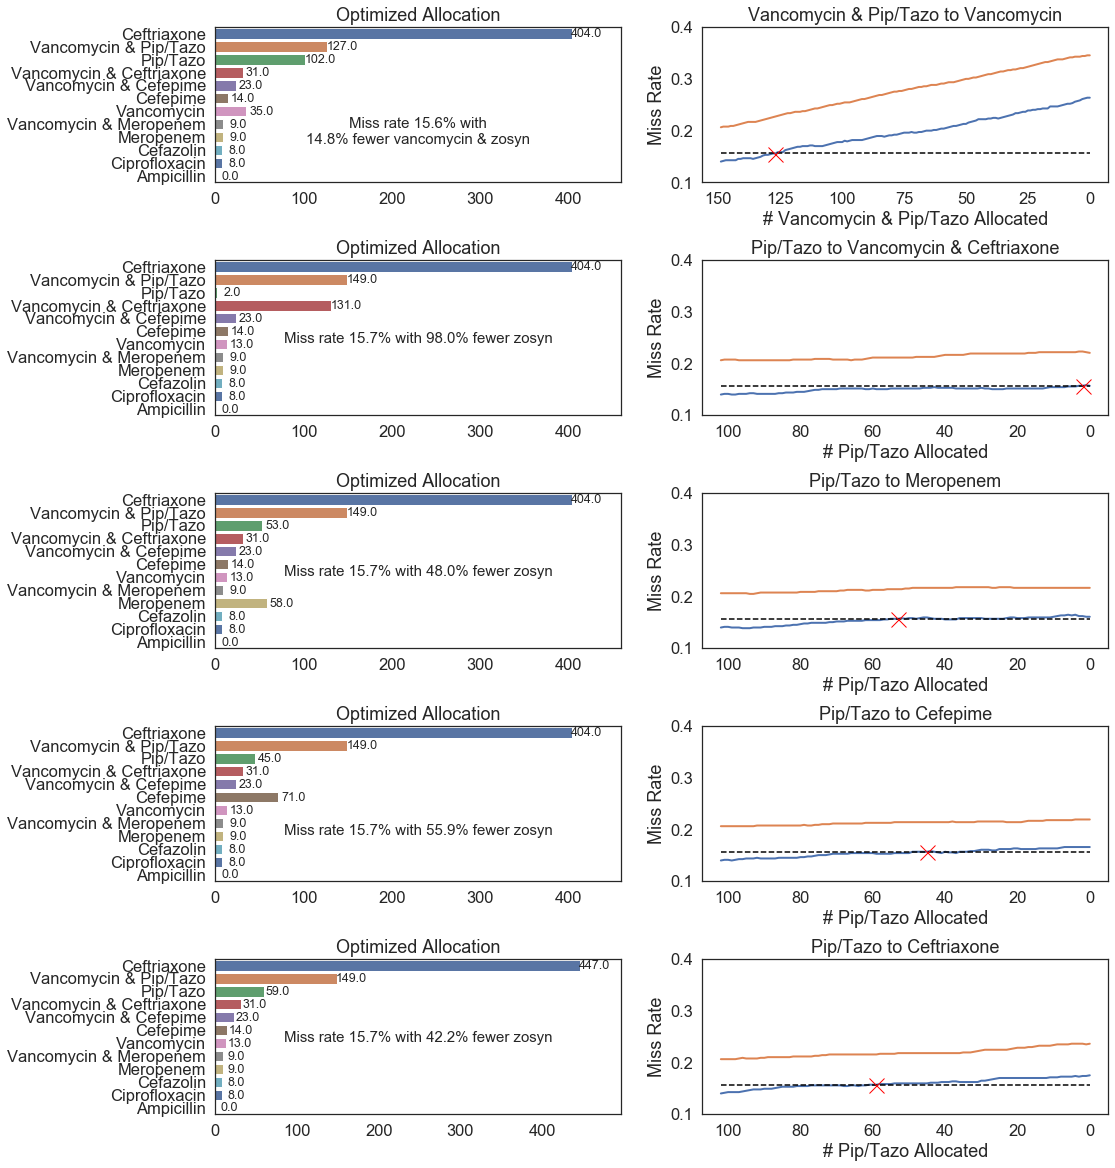

<Figure size 1152x1440 with 0 Axes>

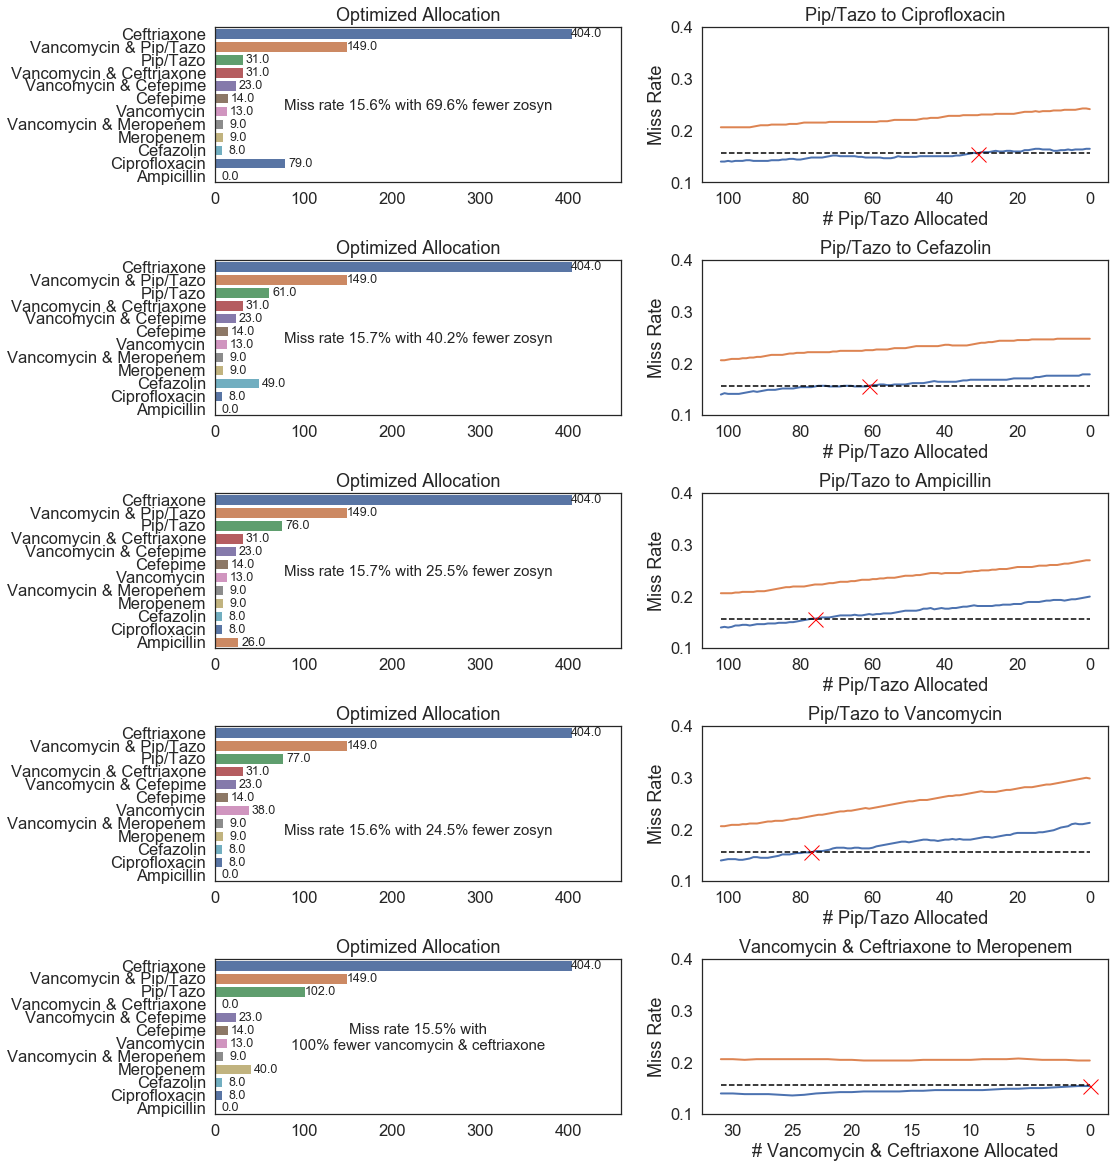

<Figure size 1152x1440 with 0 Axes>

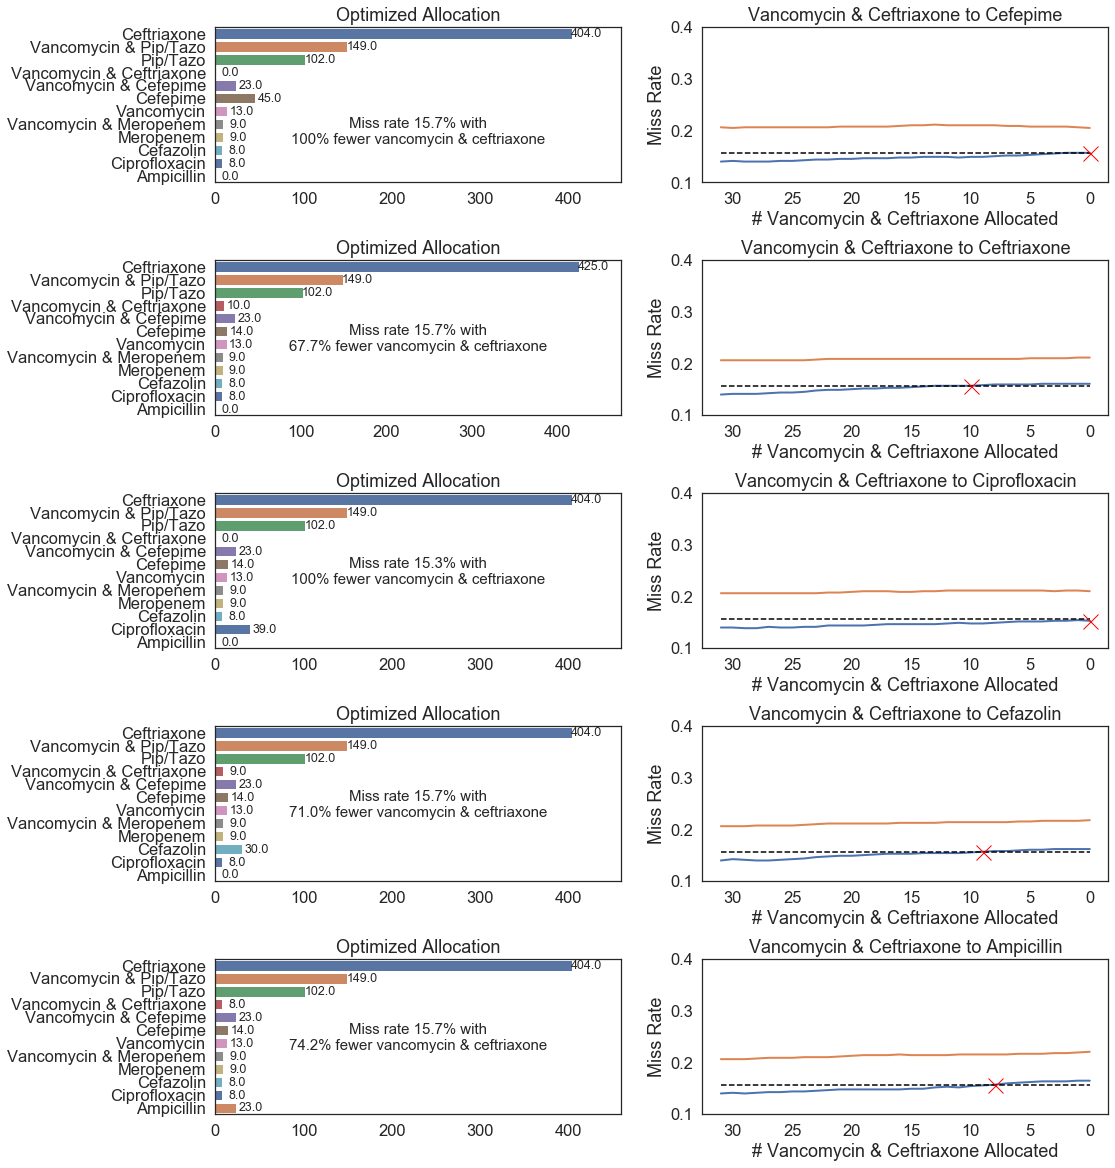

<Figure size 1152x1440 with 0 Axes>

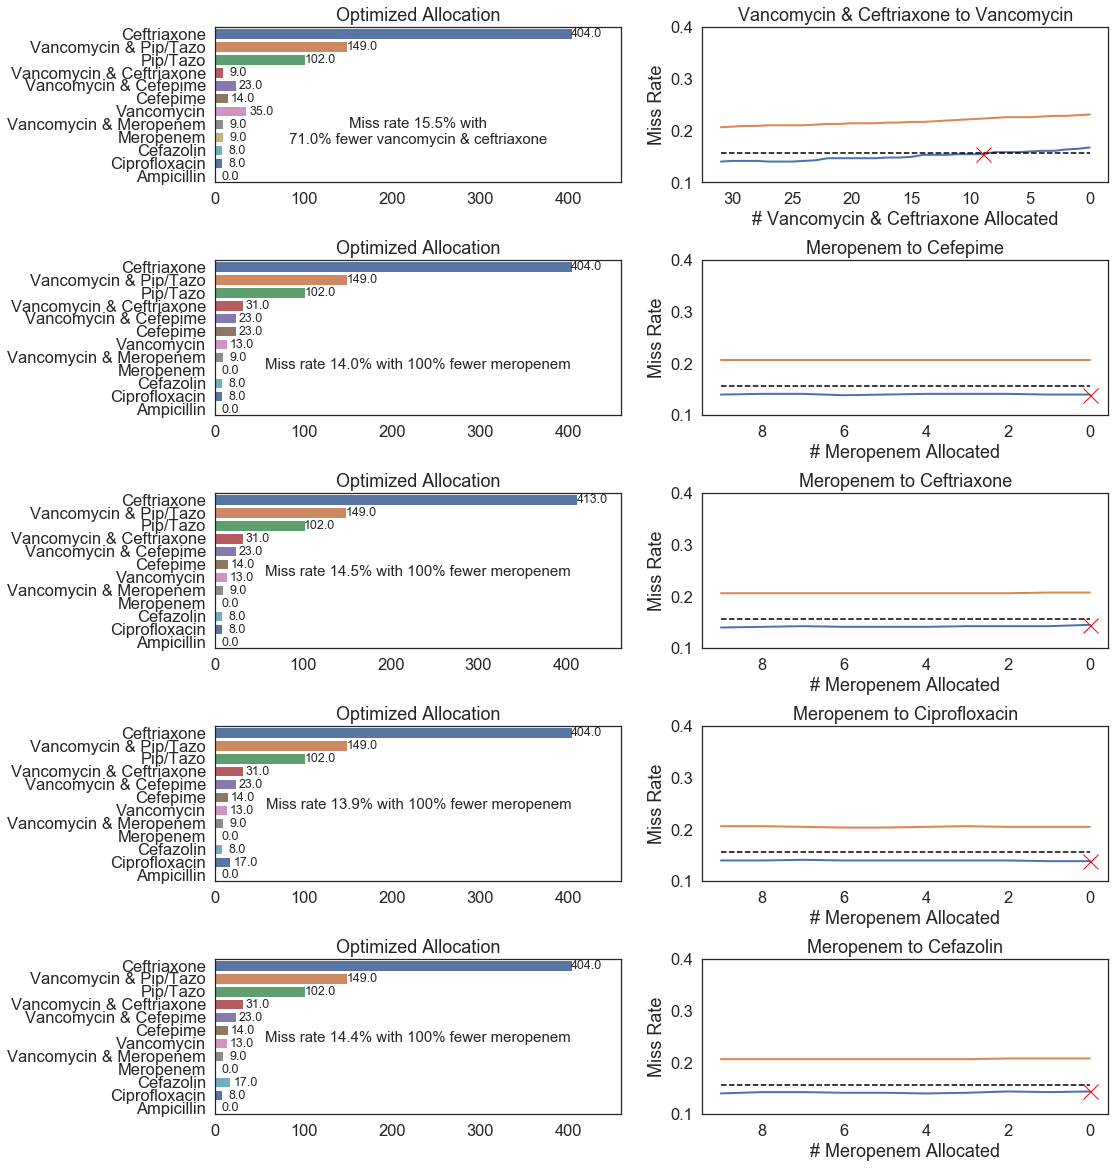

<Figure size 1152x1440 with 0 Axes>

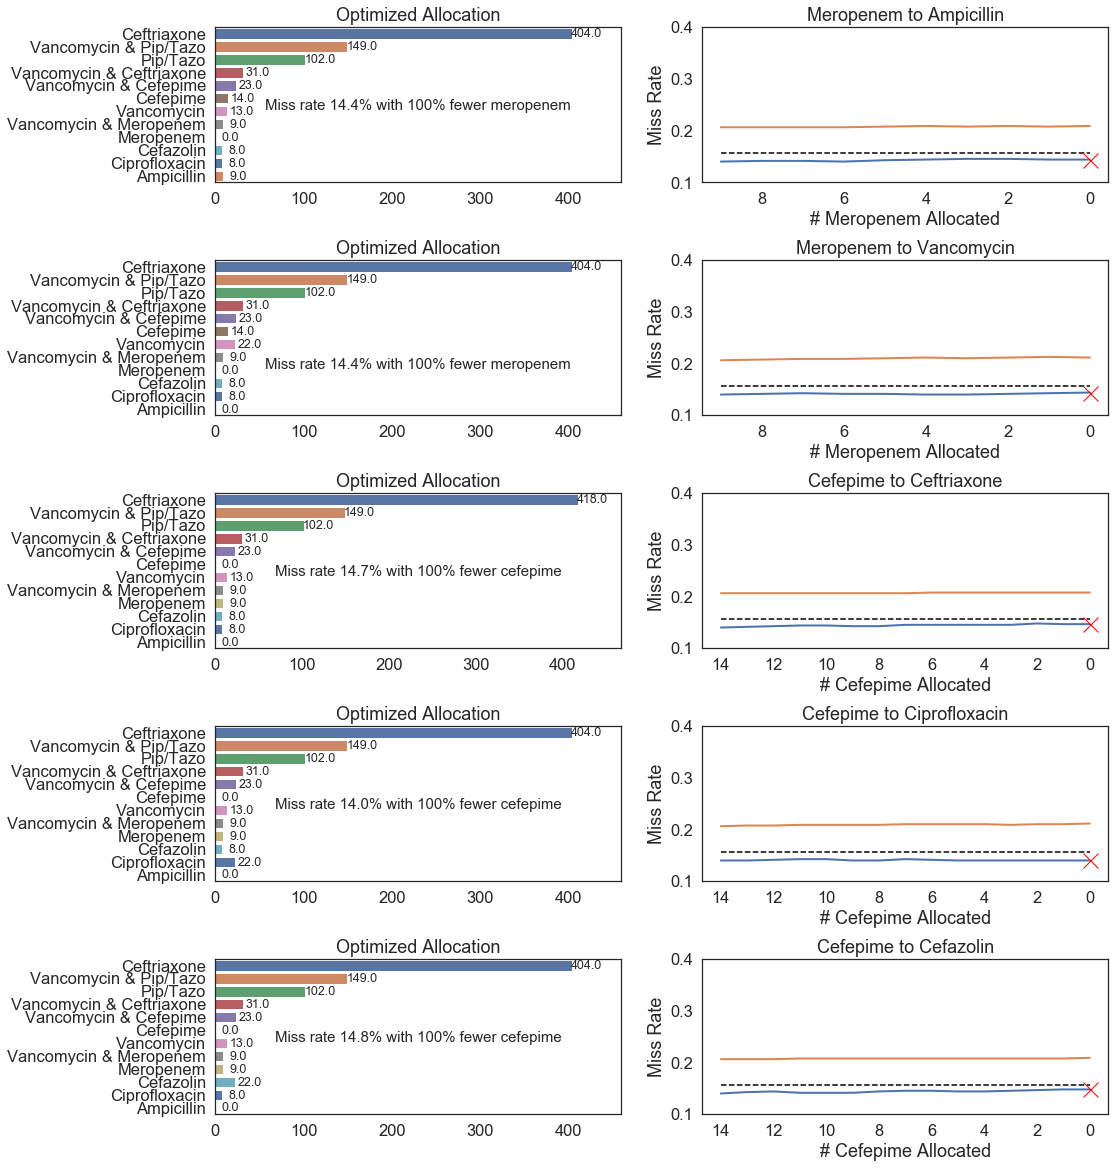

<Figure size 1152x1440 with 0 Axes>

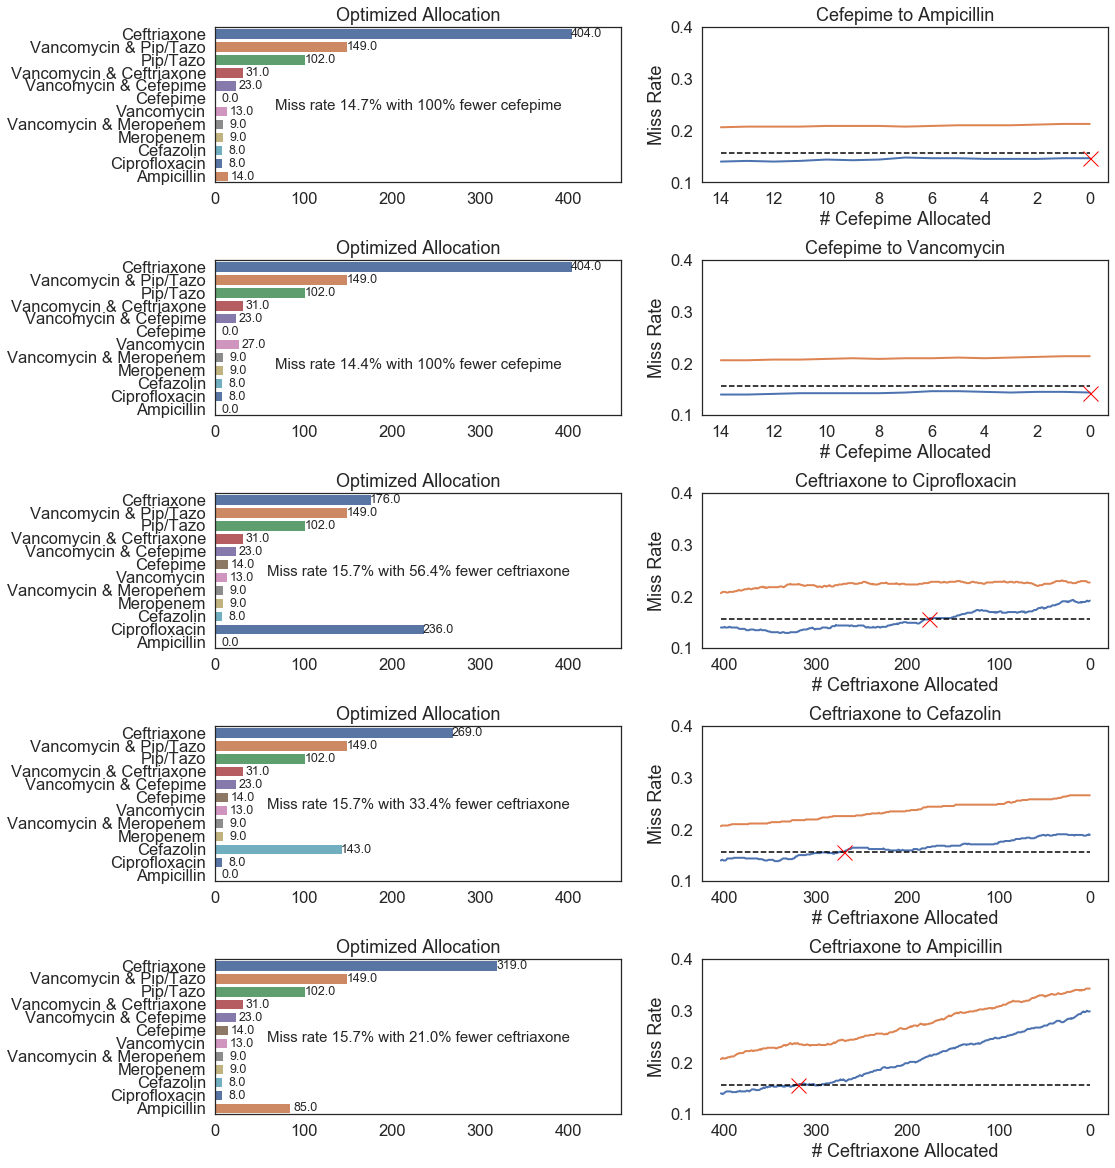

<Figure size 1152x1440 with 0 Axes>

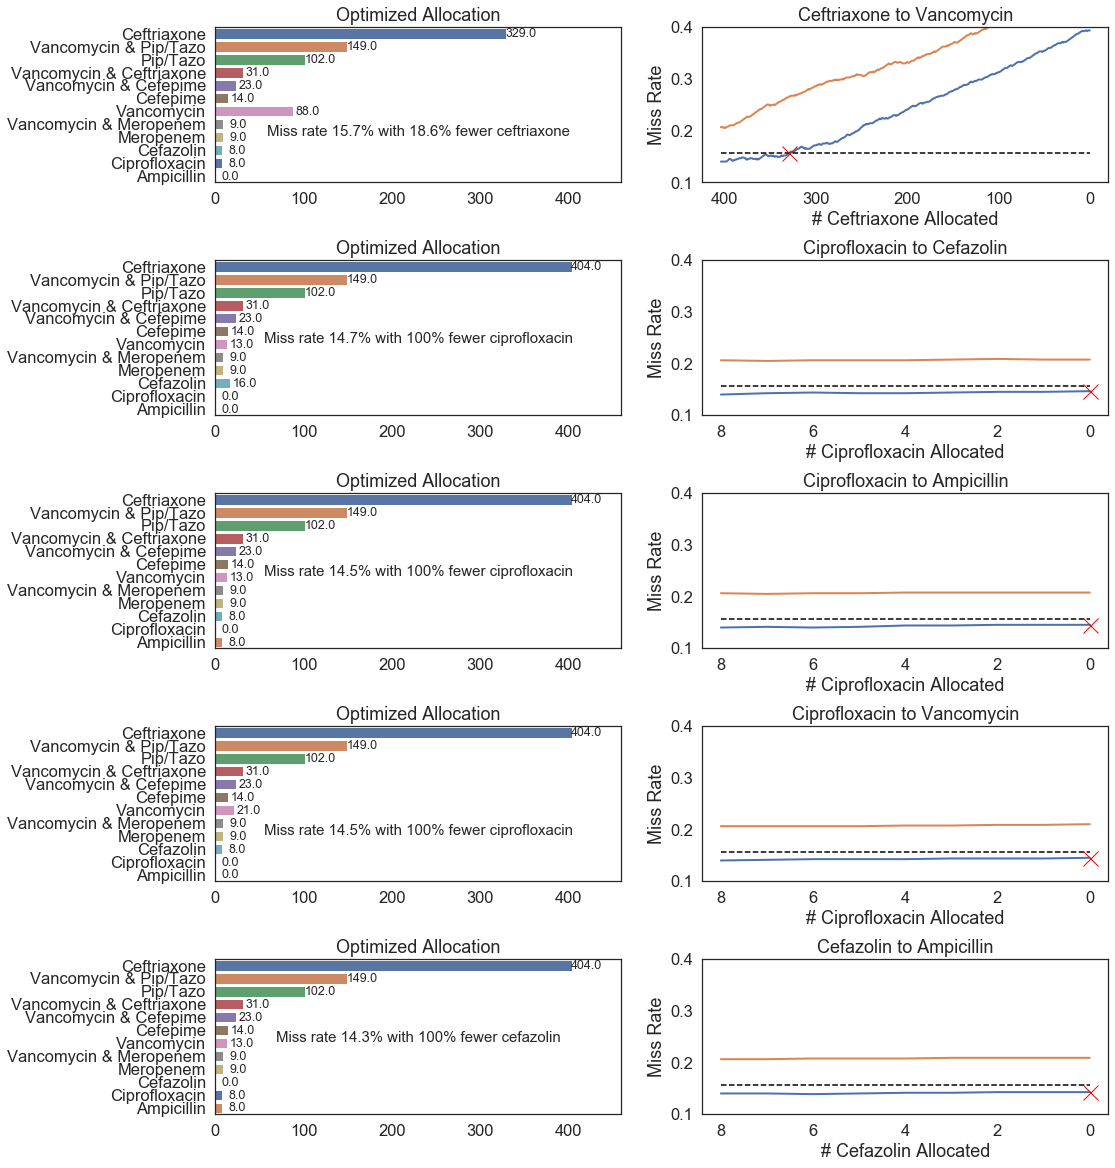

In [19]:
### Lets do 5 rows per page. 
combo_index = 0
page = 0
while combo_index < len(abx_combos)-1:
    fig = plt.figure(figsize=(16, 20))
    if combo_index == 0:
        num_sweeps = min(5, len(abx_combos) + 1)
    else:
        num_sweeps = min(5, len(abx_combos) - combo_index)
    plt.figure(figsize=(16, num_sweeps*4))
    
    if combo_index == 0:
        axes = create_axes(num_sweeps, first=True)
    else:
        axes = create_axes(num_sweeps)
    
    for ax in axes:
        if len(ax) == 1:
            plot_histogram(abx_settings, ax[0])
            ax[0].set_title("Observed Clinician Allocation")
            ax[0].set_xlabel('')
        else:
            
            # Perform sweep
            if combo_index == 0:
                legend = True
            else:
                legend = False
            fname = './sweep_results/%s_to_%s.txt' % (abx_combos[combo_index][0], abx_combos[combo_index][1])
            settings, miss_rate, reduction_rate = perform_sweep(opt,
                                                  abx_1=abx_combos[combo_index][0],
                                                  abx_2=abx_combos[combo_index][1],
                                                  ax=ax[1],
                                                  fname=fname,
                                                  legend=legend,
                                                  append=False)
            
            sweep_name = abx_combos[combo_index][0].lower().replace('_', ' & ')
            plot_histogram(settings, ax[0], miss_rate, reduction_rate, sweep_name, abx2=abx_combos[combo_index][1])
            ax[0].set_title("Optimized Allocation")
            
            combo_index += 1
    
    
    #pp.savefig(bbox_inches='tight')
    plt.savefig('sweeps_page_%s.png' % str(page), bbox_inches='tight')
    page += 1

